# **Question: 1**


Let $f(x)$ be a function of $x$.

$$f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + x + 2\tag{1.1}$$

a. [1.5 Marks] Plot the function for $$-2.5 \le x \le 1.5$$

b. [2 Marks] What is the actual slope of $f(x)$ at $x = 0 , -1.18625$ ?  Print $f'(x)$ and plot $f'(x)$ at $ -2 \le x \le 1.2$.

For c to e, assume step size is $0.1$.

c. [1.5 Marks] Use forward differntiation to figure out the slope at $x = 0 , -1.18625$.

d. [1.5 Marks] Use backward differntiation to figure out the slope at $x = 0 , -1.18625$.

e. [1.5 Marks] Use central differntiation to figure out the slope at $x = 0 , -1.18625$.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

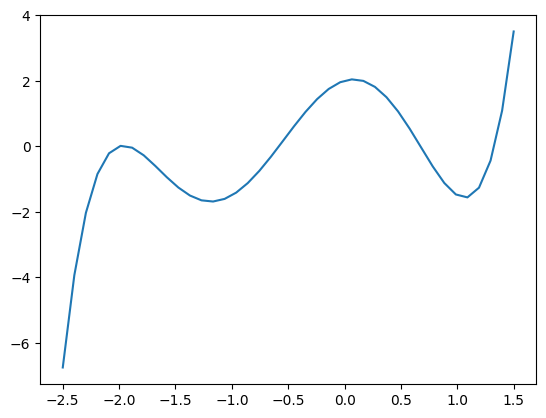

In [4]:
#a
p= Polynomial([2,1,-6,-2,2.5,1])

x_data= np.linspace(-2.5,1.5,40)
p_x = p(x_data)

plt.plot(x_data, p_x)


plt.show()


Slope of f(x) at x = 0: 1.0
Slope of f(x) at x = -1.18625: -9.340808105218201e-06
f'(x): 1.0 - 12.0·x - 6.0·x² + 10.0·x³ + 5.0·x⁴


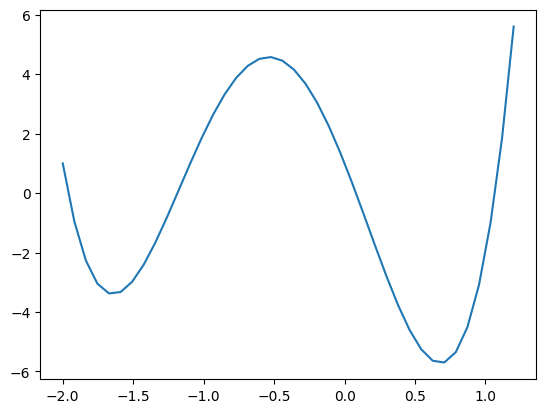

In [12]:
#b [2 Marks] What is the actual slope of  f(x)  at  x=0,−1.18625  ? Print  f′(x)  and plot  f′(x)  at  −2≤x≤1.2 .
p_prime = p.deriv(1)
print(f"Slope of f(x) at x = 0: {p_prime(0)}")
print(f"Slope of f(x) at x = -1.18625: {p_prime( -1.18625)}")

print(f"f'(x): {p_prime}")


x_data= np.linspace(-2,1.2,40)
p_x = p_prime(x_data)

plt.plot(x_data, p_x)


plt.show()


In [15]:
#c,d,e
def forward_diff(p,x,h):
  return (p(x+h) - p(x))/ h

def backward_diff(p,x,h):
  return(p(x)-p(x-h))/h

def central_diff(p,x,h):
  return(p(x+h) - p(x-h))/(2*h)

h = 0.1
print(f'''Using forward Differenciation:
At x = 0, slope: {forward_diff(p,0,h)}
At x = -1.18625, slope: {forward_diff(p, -1.18625, h)}
''')


print(f'''Using backward Differenciation:
At x = 0, slope: {backward_diff(p,0,h)}
At x = -1.18625, slope: {backward_diff(p, -1.18625, h)}
''')

print(f'''Using Central Differenciation:
At x = 0, slope: {central_diff(p,0,h)}
At x = -1.18625, slope: {central_diff(p, -1.18625, h)}
''')

Using forward Differenciation:
At x = 0, slope: 0.3826000000000018
At x = -1.18625, slope: 0.5520088838012782     

Using backward Differenciation:
At x = 0, slope: 1.5776000000000012
At x = -1.18625, slope: -0.5476397529174859     

Using Central Differenciation:
At x = 0, slope: 0.9801000000000015
At x = -1.18625, slope: 0.002184565441896158     



# **Question: 2**

You are given data points for a function, and you are required to apply Newton’s Divided Difference Interpolation to:


*   construct the interpolation polynomial
*   evaluate the interpolated value at a given point


Data Points:

x = [-1, 0, 1, 2]

y = [0.5, 3, 1.5, 8]

**Task (i) (3 Marks):**

Write a Python function divided_diff_table(x, y, n) that builds the divided difference table and returns the coefficients of the Newton polynomial.

**Task (ii) (3 Marks):**

Use the function from Task (i) to compute the interpolated value of the polynomial at x = 7. Also, display the coefficients of the Newton polynomial.

In [27]:
class Newtons_Divided_Differences:

    def __init__(self, difference, data_x):
        self.difference = difference
        self.data_x = data_x

    def n(self, k, x):

      var = 1

      for i in range(k):
        var *= x - self.data_x[i]
      return var

    def __call__(self, x):
      res = np.zeros(len(x))


      for j, x in enumerate(x):
        for i in range (0,len(self.difference )):
          res[j] += self.difference[i]*self.n(i,x)


      return res



def calc_div_diff(x,y):
    assert(len(x)==len(y))

    n = len(x)
    coef = np.zeros((n,n))
    for j in range(n):
      coef[j,0] = y[j]

    for j in range(1,n):
      for i in range (0, n-j):
        coef[i,j] = (coef[i+1,j-1] - coef[i,j-1])/(x[i+j]-x[i])


    return coef[0]


x = [-1, 0, 1, 2]
y = [0.5, 3, 1.5, 8]

differences = calc_div_diff(x,y)
p = Newtons_Divided_Differences(differences, x)
coeff = p(x)
for i in range(len(x)):
  print(x[i]  , y[i]  , coeff[i])

-1 0.5 0.5
0 3 3.0
1 1.5 1.5
2 8 8.0


In [32]:
p = Polynomial(coeff)
print( f"Interpolated value of the polynomial at x = 7: {p(7)}")
print(f"Coefficients: {coeff}")

Interpolated value of the polynomial at x = 7: 2839.0
Coefficients: [0.5 3.  1.5 8. ]


# **Question: 3**

You are given the following data points:

x = [0, 1, 2]

y = [1, 3, 2]

You are required to use the Vandermonde matrix method for polynomial interpolation.

**Task 1 (3 Marks):**

Construct the Vandermonde matrix for the given data points and compute the coefficients of the interpolating polynomial.

**Task 2 (3 Marks):**

Using the polynomial coefficients from Task 1:


1.   Evaluate the interpolated value at x = 1.5.
2.   Plot the original data points and the interpolated polynomial over the interval x = 0 to x = 2.


In [33]:
def get_poly(data_x, data_y):
    n_nodes = len(data_x)

    X = np.zeros((n_nodes, n_nodes))
    for i in range(n_nodes):
      for j in range(n_nodes):
        X[i][j] = data_x[i]**j




    X_inv = np.linalg.pinv(X)
    a = np.dot(X_inv, data_y)
    p = Polynomial(a)

    return p


x = [0, 1, 2]
y = [1, 3, 2]
p = get_poly(x,y)
print(f" Interpolated value: {p(1.5)}")

2.874999999999998


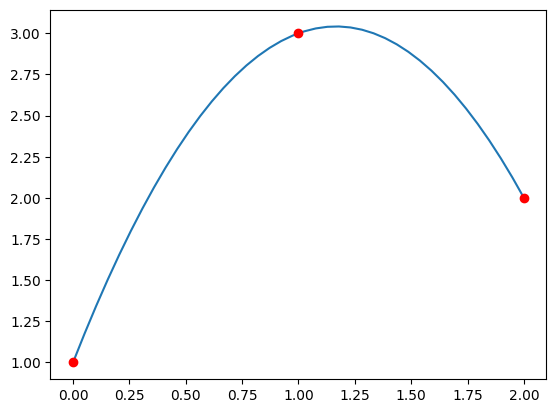

In [35]:


x_data= np.linspace(0,2,40)
p_x = p(x_data)

plt.plot(x_data, p_x)
plt.plot(x, y, 'ro')

plt.show()
